In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tableone import TableOne
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


%matplotlib inline

In [2]:
datatest = pd.read_csv('C:/Users/tn09t/Downloads/New folder (2)/test (1).csv')
datatest

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [3]:
datatrain = pd.read_csv('C:/Users/tn09t/Downloads/New folder (2)/train (1).csv')
datatrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
datatrain.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
datatest.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
#mask = datatrain.nunique() < 15
#categorical_cols = datatrain.columns[mask]
#numerical_cols = [col for col in datatrain.columns if col not in categorical_cols]

In [13]:

#datatrain[categorical_cols] = datatrain[categorical_cols].astype('category')
#datatrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   category
dtypes: category(5), float64(6), object(3)
memory usage: 654.4+ KB


In [7]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(datatrain[imputer_cols])
datatrain[imputer_cols] = imputer.transform(datatrain[imputer_cols])
datatest[imputer_cols] = imputer.transform(datatest[imputer_cols])
datatrain["HomePlanet"].fillna('Z', inplace=True)
datatest["HomePlanet"].fillna('Z', inplace=True)

In [8]:
datatrain.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train_df,test_df,columns):
    for col in columns:
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)
        train_df[col] = LabelEncoder().fit_transform(datatrain[col])
        test_df[col] =  LabelEncoder().fit_transform(datatest[col])
    return train_df, test_df

train ,test = label_encoder(datatrain,datatest,label_cols)

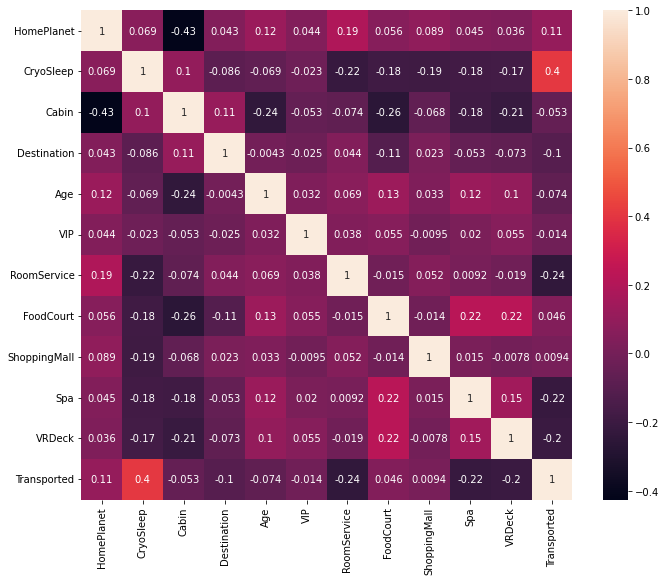

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(train.corr(), annot=True)
plt.show()

In [11]:
# Droping the Transported column from X_train because its the label we are trying to predict
# Droping the Name column for X_train because its doest affect the outcome
# Droping the Namr column for X_test

X_train = train.drop(["Transported","Name"], axis =1 )
y_train = train["Transported"]
X_test = test.drop("Name",axis=1)

In [12]:
le = LabelEncoder()
X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
X_test["PassengerId"]= le.fit_transform(X_test["PassengerId"])

In [15]:
def importances(x):
    X_train = x.drop(["Transported","Name"], axis =1 )
    y_train = x["Transported"]
    le = LabelEncoder()
    X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
    clf = RandomForestClassifier(max_depth=10, random_state=42)
    clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    return importances
    

In [16]:
importances(datatrain)

array([0.0517463 , 0.05607359, 0.17072908, 0.09735048, 0.01408284,
       0.054506  , 0.00402   , 0.13132335, 0.09298155, 0.07903103,
       0.1365303 , 0.11162547])

In [87]:
#datatrain1 = datatrain[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]
#datatrain1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [94]:
datatrain1['Transported'] = datatrain1['Transported'].apply(lambda x:1 if x == 'True'  else 0)

C:\Users\tn09t\AppData\Local\Temp/ipykernel_22632/3298739688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatrain1['Transported'] = datatrain1['Transported'].apply(lambda x:1 if x == 'True'  else 0)


In [95]:
datatrain1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0


In [ ]:
encoder = ce.OrdinalEncoder(cols=['Transported'])
    y = encoder.fit_transform(y_train)
    y = encoder.transform(y_test)

In [60]:
mask = datatrain1.nunique() < 15
categorical_cols = datatrain1.columns[mask]
numerical_cols = [col for col in datatrain.columns if col not in categorical_cols]

In [61]:
datatrain1[categorical_cols] = datatrain1[categorical_cols].astype('category')

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [62]:
datatrain1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           6606 non-null   float64 
 1   RoomService   6606 non-null   float64 
 2   FoodCourt     6606 non-null   float64 
 3   ShoppingMall  6606 non-null   float64 
 4   Spa           6606 non-null   float64 
 5   VRDeck        6606 non-null   float64 
 6   Transported   6606 non-null   category
dtypes: category(1), float64(6)
memory usage: 367.8 KB


In [81]:
import category_encoders as ce
def preprocessing(a):
    X = a.iloc[:,:-1].values
    y = a.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    return importances
    

In [69]:
datatrain1.where(datatrain1 == 'unknown')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
datatrain1['Transported'].unique()

[False, True]
Categories (2, object): [False, True]

In [74]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [75]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Transported'])




In [82]:
preprocessing(datatrain1)

ValueError: Unexpected input type: <class 'pandas.core.arrays.categorical.Categorical'>

In [65]:
    X = datatrain1.iloc[:,:-1].values
    y = datatrain1.iloc[:,-1].values

In [66]:
y

[False, True, False, False, True, ..., False, False, True, False, True]
Length: 6606
Categories (2, object): [False, True]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



In [68]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'